# CS 4820
# Assignment 6: Can AI read our mind?

# Due: 2:00pm October 16, 2019

Recently, in one of the elementary schools in China, an interesting question on the entrance exam for the 1st graders says:

    Given that 1111=0,3388= 4,1289=3,9090=4,2256=1, what is 1868?

Many kids figured it out after realizing that the trick is simply to count the number of “circles” among the digits on the left hand side of the equation (e.g., there is no circle in 1111, 4 circles in 3388, 3 circles in 1289, etc.). Therefore, the answer is 1868=5. However, such pattern/rule is truly arbitrary and is only implicitly specified in our mind. A different rule would lead to a completely different result. 

In this assignment, students will build an Artificial Neural Network to work on this question. They will go through the whole deep learning development cycle from creating the training and testing data sets, to building a deep neural network using Keras, training it and testing it, and to experimenting with various architectures of the neural net, choosing different combinations of activation functions, cost functions, and optimizers. Ultimately, based on their experiments, students would draw their conclusion to the question “can AI read our mind?”

### Prepare training and testing data

In [87]:
# Import all necessary modules in addition to numpy
import numpy as np
import itertools as it
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# your code here ...

In [82]:
# Create 10,000 data

# Let's begin with creating two empty numpy arrays
training_data = np.empty(shape=[0, 4])
target_data = np.empty(shape=[0, 1])

# Use nested for loops to populate these two numpty arrays with pairs of data.
# Each pair is a four-digit number and a target value satisfying the hidden rule 
# that you've discovered between these digits.

# You should find the np.vstack() function handy.
# your code here ...
data = np.empty(shape=[0, 5])
for n in it.product(range(10), repeat=4):
    arr = np.array(' '.join(map(str, n)).split(' '), dtype=int)
    count = 0
    
    for char in arr:
        if char == 0:
            count += 1
        elif char == 6:
            count += 1
        elif char == 8:
            count += 2
        elif char == 9:
            count += 1
            
    data = np.vstack((data, np.append(arr, [count])))

training_data = data[:, :4]
target_data = data[:, 4]

# Split the data into training and testing data sets
# Also, convert the target sets into one-hot encoded categorical values
ohe = OneHotEncoder(categorical_features = [0, 1, 2, 3])
training_data = ohe.fit_transform(training_data).toarray()
target_data = to_categorical(target_data)
# your code here ...

x_train, x_test, y_train, y_test = train_test_split(training_data, target_data, test_size=0.2, random_state=0)

C:\Users\chase\Anaconda3\envs\CS4820\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\chase\Anaconda3\envs\CS4820\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


### Build and train the model

In [83]:
# Build a deep neural net to solve this multi-class classification problem
# Refer to the tutorials and notes that you had from previous classes as your clarifications and examples

# your code here ...
model = Sequential()
model.add(Dense(32, input_shape=(40,), activation='relu'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(9, activation='softmax'))
model.compile(optimizer = 'Adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Train your neural net

# your code here ...
history = model.fit(x_train, y_train, epochs=100, verbose=2, batch_size=100)

# Plot out the training history for accurary using matplotlib

# your code here ...

Epoch 1/100
8000/8000 - 0s - loss: 1.9468 - accuracy: 0.2691
Epoch 2/100
8000/8000 - 0s - loss: 1.6696 - accuracy: 0.3004
Epoch 3/100
8000/8000 - 0s - loss: 1.5037 - accuracy: 0.4221
Epoch 4/100
8000/8000 - 0s - loss: 1.2559 - accuracy: 0.6275
Epoch 5/100
8000/8000 - 0s - loss: 1.0277 - accuracy: 0.7266
Epoch 6/100
8000/8000 - 0s - loss: 0.8428 - accuracy: 0.8048
Epoch 7/100
8000/8000 - 0s - loss: 0.6950 - accuracy: 0.8615
Epoch 8/100
8000/8000 - 0s - loss: 0.5813 - accuracy: 0.8649
Epoch 9/100
8000/8000 - 0s - loss: 0.4901 - accuracy: 0.8870
Epoch 10/100
8000/8000 - 0s - loss: 0.4166 - accuracy: 0.9514
Epoch 11/100
8000/8000 - 0s - loss: 0.3594 - accuracy: 0.9586
Epoch 12/100
8000/8000 - 0s - loss: 0.3149 - accuracy: 0.9588
Epoch 13/100
8000/8000 - 0s - loss: 0.2802 - accuracy: 0.9588
Epoch 14/100
8000/8000 - 0s - loss: 0.2533 - accuracy: 0.9588
Epoch 15/100
8000/8000 - 0s - loss: 0.2324 - accuracy: 0.9588
Epoch 16/100
8000/8000 - 0s - loss: 0.2159 - accuracy: 0.9588
Epoch 17/100
8000

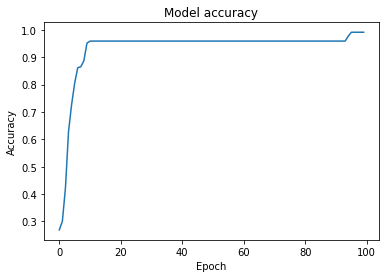

In [84]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

### Test the model

- Test your model with one or two specific test cases to manually verify the correctness of the prediction
- Test your model with the entire testing dataset to obtain the overall accuracy, f1 scores, confusion matrix, etc.

In [85]:
# Test your neural net and report the results

# your code here ...
print(np.argmax(model.predict(x_test[0][np.newaxis])) == np.argmax(y_test[0]))
print(np.argmax(model.predict(x_test[2][np.newaxis])) == np.argmax(y_test[2]))

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test1 = np.argmax(y_test, axis=1)

print(classification_report(y_test1, y_pred))


True
True
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       259
           1       1.00      1.00      1.00       534
           2       1.00      1.00      1.00       535
           3       1.00      1.00      1.00       393
           4       1.00      1.00      1.00       194
           5       0.78      1.00      0.87        66
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00         1

   micro avg       0.99      0.99      0.99      2000
   macro avg       0.72      0.75      0.73      2000
weighted avg       0.98      0.99      0.99      2000



C:\Users\chase\Anaconda3\envs\CS4820\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


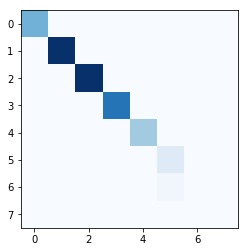

In [88]:
cm = confusion_matrix(y_test1, y_pred)
plt.imshow(cm, cmap='Blues')

### Improve the model

Try to improve your model by exprimenting in a variety of ways:

- different number of layers
- different number of neurons in each layer
- other activation functions
- other loss functions
- other optimizers

Compare and report your results.

In [90]:
# your code here ...
model = Sequential()
model.add(Dense(64, input_shape=(40,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(9, activation='softmax'))
model.compile(optimizer = 'Adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Train your neural net

# your code here ...
history = model.fit(x_train, y_train, epochs=100, verbose=2, batch_size=100)


Epoch 1/100
8000/8000 - 0s - loss: 1.8306 - accuracy: 0.2812
Epoch 2/100
8000/8000 - 0s - loss: 1.1822 - accuracy: 0.6145
Epoch 3/100
8000/8000 - 0s - loss: 0.6519 - accuracy: 0.9097
Epoch 4/100
8000/8000 - 0s - loss: 0.3562 - accuracy: 0.9550
Epoch 5/100
8000/8000 - 0s - loss: 0.2153 - accuracy: 0.9606
Epoch 6/100
8000/8000 - 0s - loss: 0.1478 - accuracy: 0.9675
Epoch 7/100
8000/8000 - 0s - loss: 0.1016 - accuracy: 0.9790
Epoch 8/100
8000/8000 - 0s - loss: 0.0704 - accuracy: 0.9872
Epoch 9/100
8000/8000 - 0s - loss: 0.0506 - accuracy: 0.9914
Epoch 10/100
8000/8000 - 0s - loss: 0.0382 - accuracy: 0.9930
Epoch 11/100
8000/8000 - 0s - loss: 0.0304 - accuracy: 0.9931
Epoch 12/100
8000/8000 - 0s - loss: 0.0251 - accuracy: 0.9941
Epoch 13/100
8000/8000 - 0s - loss: 0.0214 - accuracy: 0.9945
Epoch 14/100
8000/8000 - 0s - loss: 0.0182 - accuracy: 0.9965
Epoch 15/100
8000/8000 - 0s - loss: 0.0158 - accuracy: 0.9976
Epoch 16/100
8000/8000 - 0s - loss: 0.0136 - accuracy: 0.9985
Epoch 17/100
8000

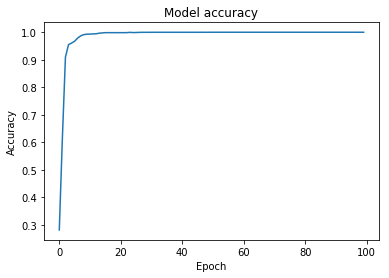

True
True
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       259
           1       1.00      1.00      1.00       534
           2       1.00      1.00      1.00       535
           3       1.00      1.00      1.00       393
           4       1.00      1.00      1.00       194
           5       1.00      1.00      1.00        66
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



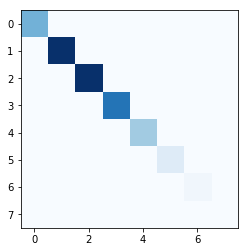

In [93]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

print(np.argmax(model.predict(x_test[0][np.newaxis])) == np.argmax(y_test[0]))
print(np.argmax(model.predict(x_test[2][np.newaxis])) == np.argmax(y_test[2]))

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test1 = np.argmax(y_test, axis=1)

print(classification_report(y_test1, y_pred))


cm = confusion_matrix(y_test1, y_pred)
plt.imshow(cm, cmap='Blues')

### Conclusion

So, what is your conclusion to the question "can AI read our mind"?

A.I. can most definitely not read our minds, but what it can do is detect patterns when built and trained properly. All that is happening here is just that, a model has been built and passed in the proper data to notice a particular pattern. If we switched up that pattern and perhaps redesigned the model a little we'd likely be able to predict that one to, all it takes is a little elbow grease and some time. 